# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau! 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. В файлі ви знайдете опис колонок і значення. 

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх, 
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** 

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql. 

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga. 

## Попередній огляд та очистка даних

In [1]:
# іммпорт необхідних бібіліотек для аналізу

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
path_to_file = '/home/anna/data/Grocery Database.xlsx'
xl = pd.ExcelFile(path_to_file)

In [3]:
df_grosto = xl.parse('Grosto DB')

In [4]:
df_grosto.shape

(50447, 32)

Датафрейм має 50447 рядки та 32 колонки

In [5]:
display(df_grosto[:3], df_grosto[-3:])

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820
50446,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,42,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.107,0.15,0.743,0.65163,0.9135,4.52487


In [6]:
# Зміна ліміту кількості відображення колонок та рядків для зручності перегляду

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

In [7]:
# Огляд типів даних колонок

df_grosto.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

Більшість колонок мають відповідний тип даних. Колонку Mobile Number варто перетворити на тип даних str, оскільки по ній не потрібні калькуляції, а також може бути потрібно змінити формати написання номера. Але оскільки попередньо не планую використовувати її в аналізі, лишаю без змін. Вміст даних колонки Time не є зручним для аналізу, тож варто створиту додаткову колонку з виділенням лише години покупки з типом даних int. 

In [8]:
# Перевірка кількості пропущених значень

df_grosto.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

Пропущені дані відстутні

In [9]:
#Перевірка кількості дублікатів в датафреймі

print(f'В датафреймі знайдено {df_grosto.duplicated().sum()} дублікат(и)')

В датафреймі знайдено 1 дублікат(и)


In [10]:
# Створення глибокої копії даних для подальших трансформацій

df = df_grosto.copy(deep=True)

In [11]:
# Видалення дублікатів

df.drop_duplicates(inplace=True)

In [12]:
# Переіменування колонок для зручності написання коду

df.columns

Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')

In [13]:
df.rename(columns={
    'Receipt Number': 'receipt_number',
    'Date': 'date',
    'Year': 'year',
    'Month': 'month',
    'Time': 'time',
    'Mobile Number': 'mobile_number',
    'Membership ID': 'membership_id',
    'Loyalty Card Points': 'loyalty_card_points',
    'Age': 'age',
    'Gender': 'gender',
    'City': 'city',
    'Country': 'country',
    'Category': 'category',
    'Sub_Category': 'sub_category',
    'Items': 'items',
    'Brand ': 'brand',
    'Description ': 'description',
    'Price': 'price',
    'QTY': 'quantity',
    'DISC': 'discount',
    'Amount': 'amount',
    'Net Bill Amount': 'net_bill_amount',
    'GST': 'gst',
    'Gross Bill Amount': 'gross_bill_amount',
    'Payment Mode': 'payment_mode',
    'Bank Name': 'bank_name',
    '% Profit Margin': 'percent_profit_margin',
    '% Operating Cost': 'percent_operating_cost',
    '% Product Cost': 'percent_product_cost',
    'Profit Margin': 'profit_margin',
    'Operating Cost': 'operating_cost',
    'Product Cost': 'product_cost'
}, inplace=True)


In [14]:
df.head(3)

,receipt_number,date,year,month,time,mobile_number,membership_id,loyalty_card_points,age,gender,city,country,category,sub_category,items,brand,description,price,quantity,discount,amount,net_bill_amount,gst,gross_bill_amount,payment_mode,bank_name,percent_profit_margin,percent_operating_cost,percent_product_cost,profit_margin,operating_cost,product_cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693


In [15]:
# Огляд унікальних значень колонок, які мають обмежений набір повторюваних значень

for column in ['gender', 'category', 'sub_category', 'payment_mode', 'bank_name', 'country', 'city' ]:
    unique_values = sorted(df[column].unique())
    print(f"Унікальні значення у стовпці '{column}':")
    print(unique_values)
    print()

Унікальні значення у стовпці 'gender':
['Female', 'Male']

Унікальні значення у стовпці 'category':
['Bakery & Breakfast', 'Beauty', 'Beverages', 'Choco, Snacks, Sweets', 'Dairy, Chilled & Eggs', 'Frozen', 'Fruit & Vegetable', 'Health', 'Household', 'Kitchen & Dining', 'Meat & Seafood', 'Mother & Baby', 'Party Supplies', 'Pet Care', 'Rice & Cooking Essentials', 'Wines, Beers & Spirits']

Унікальні значення у стовпці 'sub_category':
['Adult Diapers & Incontinence', 'Air Care', 'BBQ Supplies', 'Baby & Toddler Food', 'Baby Laundry & Cleaning', 'Baby Toiletries', 'Baby Wipes', 'Bath & Body', 'Beer', 'Berries', 'Biscuits & Crackers', 'Bread & Pasteries', 'Butter & Margarine', 'Cat Food & Treat', 'Cereal & Protein Bars', 'Champagne & Spakling Wine', 'Chilled Juices & Drinks', 'Chocolate, Malt & Hot Cereals', 'Cider', 'Cleaning Supplies', 'Deli & Cooked Meat', 'Dishwashing', 'Disposable Tableware', 'Dog Food & Trat', 'Eggs', 'Feeding & Nursing', 'Fresh Bread', 'Fresh Fruit', 'Fresh Meat', 'Fr

При огляді даних значень колонок не виявлено розрізненності в написанні одних і тих самих значень. 
Помітно, що магазин предствлений у 4-х країнах та 5-и містах, тобто є країна в якій є два магизини компанії. 
Поглянемо на приналежність міст до країни:

In [16]:
display(df.groupby('country')['city'].unique())

country
Indonesia               [Jakarta]
Malaysia           [Kuala Lumpur]
Philippines              [Manila]
Singapore      [Bedok, Woodlands]
Name: city, dtype: object

В Сінгапурі магазин(и) представлені в двох містах, в Індонезії, Малазії та Філіпінах - в одному. Варто це враховувати в подальшому представленні деяких результатів аналізу.

#### Зміна типу даних та створення нових колонок

In [17]:
# створення колонки з зазначенням міста та країни

df['city_country'] = df[['city', 'country']].agg(', '.join, axis=1)

In [18]:
# створення колонки з категоріями клієнтів за віком 

age_group_names = ['up to 25 years', '26 - 35 years',
                      '36 - 45 years', '46 - 55 years', 
                      '56 - 65 years', '66 + years' ]

ranges = [0, 25, 35, 45, 55, 65, np.inf]

In [19]:
df['age_group'] = pd.cut(df['age'], bins = ranges, labels = age_group_names)

In [20]:
# перетворення колонок з обмеженим набором повторюваних значень на категоріальний тип

for col in ['gender', 'category', 'payment_mode', 'bank_name', 'city_country']:
    df[col] = pd.Categorical(df[col])

In [21]:
# створення нової колонки з виділенням години відвідування та перетворення типу даних з str на int

df['time'] = df['time'].astype(str)
df['hour'] = df['time'].str.slice(stop=2).astype(int)


In [22]:
# перевірка та перерахунок колонок 'amount', 'net_bill_amount', 'gross_bill_amount'
# для наглядності візьмемо перший чек з помилковими розрахунками

df_check_recipt = (
    df[df['receipt_number'] == 'GIJ00003']
    [['price', 'quantity', 'amount', 'discount', 'net_bill_amount', 'gross_bill_amount', 'gst']]
)

df_check_recipt

,price,quantity,amount,discount,net_bill_amount,gross_bill_amount,gst
2,13.31,1,13.1769,0.01,38.3526,42.18786,0.1
3,3.52,1,3.4848,0.01,38.3526,42.18786,0.1
4,4.41,1,4.3659,0.01,38.3526,42.18786,0.1
5,2.81,1,2.7819,0.01,38.3526,42.18786,0.1
6,3.28,1,3.2472,0.01,38.3526,42.18786,0.1
7,3.75,1,3.7125,0.01,38.3526,42.18786,0.1


In [23]:
df_check_recipt['amount'].sum()

30.769199999999998

In [24]:
df_check_recipt['price'].sum()

31.080000000000002

In [25]:
# перевірка чи пораховно вірно колонку 'amount'

expected_amount = df['price'] * df['quantity'] * (1 - df['discount'])
different_amount = df[np.abs(df['amount'] - expected_amount) > 0.0001]
different_amount

,receipt_number,date,year,month,time,mobile_number,membership_id,loyalty_card_points,age,gender,city,country,category,sub_category,items,brand,description,price,quantity,discount,amount,net_bill_amount,gst,gross_bill_amount,payment_mode,bank_name,percent_profit_margin,percent_operating_cost,percent_product_cost,profit_margin,operating_cost,product_cost,city_country,age_group,hour


В ході огляду та перерахунку деяких чеків, виявлено, що в деяких з них невірно порахована колонка 'net_bill_amount' і як наслідок 
'gross_bill_amount'. Колонка 'amount' порахована вірно. Також можна виключити припущення, що помилка  в ненарахуванні дискаунту. Варто детальніше дослідити закономірності в невірно порахованих чеках, можливо помилка саме по одній з країн тощо.

In [26]:
# перерахунок колонок з некоректними значеннями та запис перерахованих значень у нові колонки

df['net_bill_amount_correct'] = df.groupby('receipt_number')['amount'].transform('sum')
df['gross_bill_amount_correct'] = df['net_bill_amount_correct'] + df['net_bill_amount_correct']*df['gst']

In [27]:
# чек з новими колонками з коректними значеннями

df[df['receipt_number'] == 'GIJ00003'][['price', 'quantity', 'amount', 'discount', 'net_bill_amount', 'gross_bill_amount', 'gst', 'gross_bill_amount_correct', 'net_bill_amount_correct']]

,price,quantity,amount,discount,net_bill_amount,gross_bill_amount,gst,gross_bill_amount_correct,net_bill_amount_correct
2,13.31,1,13.1769,0.01,38.3526,42.18786,0.1,33.84612,30.7692
3,3.52,1,3.4848,0.01,38.3526,42.18786,0.1,33.84612,30.7692
4,4.41,1,4.3659,0.01,38.3526,42.18786,0.1,33.84612,30.7692
5,2.81,1,2.7819,0.01,38.3526,42.18786,0.1,33.84612,30.7692
6,3.28,1,3.2472,0.01,38.3526,42.18786,0.1,33.84612,30.7692
7,3.75,1,3.7125,0.01,38.3526,42.18786,0.1,33.84612,30.7692


#### Перегляд статистичної інформації по колонкам з числовими значеннями

In [28]:
# виключення числових колонок, по яким статистичні показники будуть неінформативні
df_for_statistic = df.drop(['date', 'year', 'month', 'mobile_number'], axis=1)

In [29]:
df_for_statistic.describe()

,loyalty_card_points,age,price,quantity,discount,amount,net_bill_amount,gst,gross_bill_amount,percent_profit_margin,percent_operating_cost,percent_product_cost,profit_margin,operating_cost,product_cost,hour,net_bill_amount_correct,gross_bill_amount_correct
count,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000,5.044600e+04,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000,50446.000000
mean,18.364588,35.801292,7.424249,1.548190,0.029938,11.168105,66.696378,0.085553,72.380184,0.105550,1.500000e-01,0.744450,1.201698,1.726873,8.583917,15.542263,63.919867,69.362525
std,16.161135,14.020092,4.753613,0.648463,0.014229,9.227197,45.269542,0.023568,49.093296,0.029403,1.321178e-13,0.029403,1.063549,1.426849,7.134986,3.456698,44.442011,48.187158
min,0.000000,15.000000,0.840000,1.000000,0.010000,0.798000,0.978500,0.060000,1.037210,0.051000,1.500000e-01,0.700000,0.067840,0.126000,0.609840,10.000000,0.978500,1.037210
25%,6.000000,23.000000,4.280000,1.000000,0.020000,5.214075,35.336700,0.070000,38.615940,0.083000,1.500000e-01,0.722000,0.545600,0.805500,4.082890,13.000000,33.158400,35.890368
50%,14.000000,35.000000,5.980000,2.000000,0.030000,8.632800,58.586500,0.070000,63.909120,0.109000,1.500000e-01,0.741000,0.928350,1.329000,6.649080,16.000000,54.390600,59.236056
75%,26.000000,47.000000,9.470000,2.000000,0.040000,14.016000,90.585000,0.100000,98.076440,0.128000,1.500000e-01,0.767000,1.505415,2.178000,10.828800,19.000000,85.516800,92.444576
max,116.000000,75.000000,40.330000,9.000000,0.050000,299.827200,527.668000,0.120000,559.328080,0.150000,1.500000e-01,0.799000,26.234880,46.848000,239.237120,21.000000,527.668000,559.328080


Бачимо великий розкид в значеннях пов'язаних з вартістю товарів та сумою покупок. Що вирогідно є типовою ситуацією для продажу товарів різноманітних категорій, фасування, цінової політики тощо.

## Аналіз

#### 1. Який загальний прибуток отримала компанія? Яка частка прибутку по кожному місту? 

In [30]:
print(f'Загальний прибуток - {df["profit_margin"].sum():.2f}')

Загальний прибуток - 60620.85


Прибуток компанії по країнам відсортований від найбільшого до найменшого:

In [31]:
df.groupby('country')['profit_margin'].sum().round(2).sort_values(ascending=False)

country
Singapore      22138.51
Philippines    14455.63
Malaysia       12958.12
Indonesia      11068.60
Name: profit_margin, dtype: float64

In [32]:
# визначення даних для зовнішнього та внутрішнього кільця графіку
outer = df.groupby('country')['profit_margin'].sum()
inner = df.groupby(['country', 'city'])['profit_margin'].sum()

# визначення лейблів для внутрішнього кільця
inner_labels = inner.index.get_level_values(1)

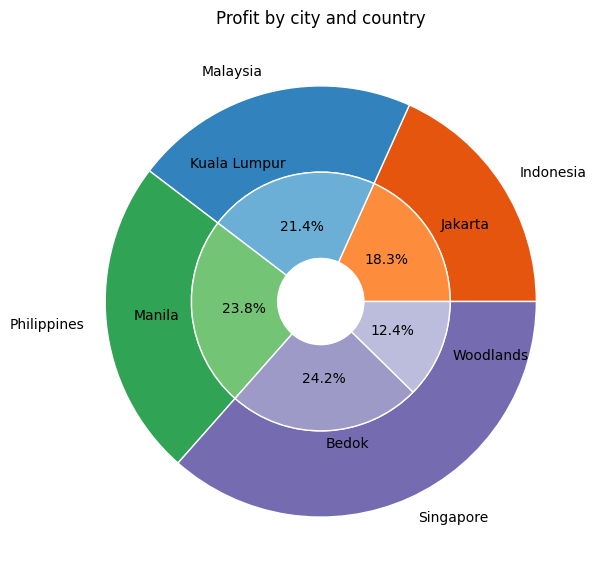

In [33]:
fig, ax = plt.subplots(figsize=(7, 7))
size = 0.4

cmap = plt.colormaps['tab20c']
outer_colors = cmap([4, 0, 8, 12])
inner_colors = cmap([5, 1, 9, 13, 14])

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       #autopct='%1.1f%%',
       colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       autopct='%1.1f%%',
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))


ax.set(aspect="equal", title='Profit by city and country');

Прибуток в Сінгапурі складає третину від прибутку по всім країнам, тут магазини представлені у двох містах. 
Найменша частка прибутку в Індонезії.
Поміж міст Бедок має найбільшу частку, Вудландс - найменшу частку прибутку. Обидва міста знаходяться в Сингапурі.
Необхідно уточнити деталі особливостей розташування, розмірів магазинів, тощо в Вудлендс (Сінгапур) та Джакарта (Індонезія). Або ж дослідити причини чому ці міста приносять найменшу частку прибутку.

Цікаво також поглянути на динаміку отримання прибутуку по рокам. Розглянемо це далі:

#### 2. Яка загальна тенденція отримання прибутку по рокам?

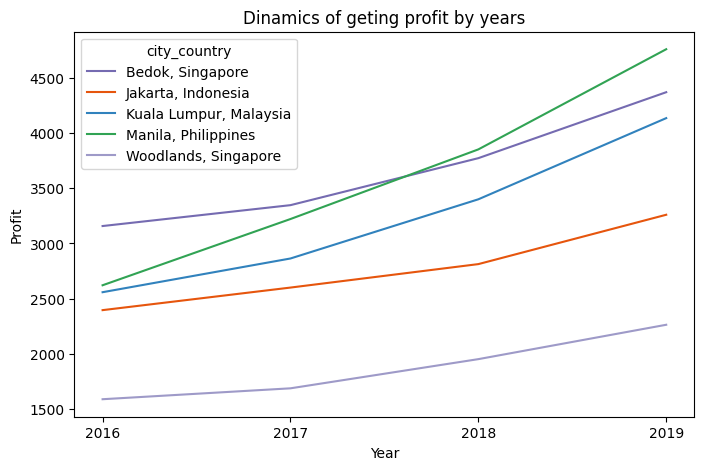

In [34]:
# використання аналогічних кольорів для позначення міст, що і в попердньому графіку
colors = cmap([12, 4, 0, 8, 13])

df.pivot_table(                  
    index='year', columns='city_country', values='profit_margin', aggfunc='sum'
    ).plot(figsize=(8, 5), color=colors)

plt.xticks(np.arange(2016, 2020))
plt.title('Dinamics of geting profit by years')
plt.xlabel('Year')
plt.ylabel('Profit');

Простежується загальна тенденція до зростання прибутку по всім містам. 
Найбільш стрімке зростання простежується в Маніла (Філіппіни). Варто дослідити ринок цієї країни та роглядати в першу чергу для розширення мережі.
Також можна помітити, що в Сінгапурі міста Бедок та Вудлендс мають дещо схожу динаміку.

#### 3. Які категорії товарів є найприбутковішими?

In [66]:
df.pivot_table(
    index='category', columns='city', values='profit_margin', aggfunc='sum'
    ).style.background_gradient(axis=0, cmap='YlGn').format(precision=0)



city,Bedok,Jakarta,Kuala Lumpur,Manila,Woodlands
category,,,,,
Bakery & Breakfast,1547,1111,1354,1493,720
Beauty,1869,1427,1785,1898,1010
Beverages,562,443,508,574,322
"Choco, Snacks, Sweets",758,504,618,725,352
"Dairy, Chilled & Eggs",635,493,596,612,332
Frozen,2075,1810,2011,2121,1244
Fruit & Vegetable,1261,802,878,964,482
Health,434,288,383,412,258
Household,428,344,415,421,260


Помітно загальну тенденцію по всім містам по найбільш прибутковим категоріям. Ця інформація корисна для планування, закупівля продукції, рекламних компаній, маркетингових активностей. Як приклад, можна розробити рекламну компанію з наголосом на те, що в мережі найкращий асортимент заморожених продуктів.

Розглянемо список категорій відсортований за спадянням від найбільш прибуткової до найменш. Додатково варто поглянути на популярність категорій за кількістю придбаних товарів.

In [63]:
sorted_profit_by_category = (
    df.groupby('category')['profit_margin'].sum().round(2).sort_values(ascending=False).reset_index()
)

In [67]:
sorted_quantity_by_category = (
    df.groupby('category')['quantity'].sum().sort_values(ascending=False).reset_index()
)

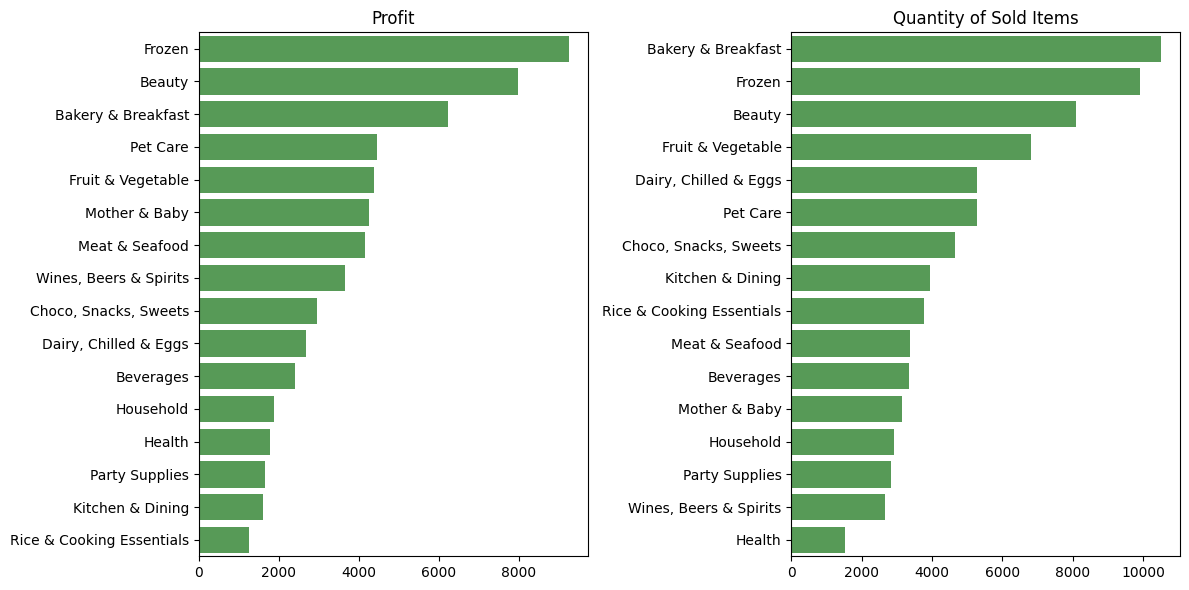

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# графік категорій відсортованих за профітом
(
    sns.barplot(x='profit_margin', y='category', data=sorted_profit_by_category,
                estimator=sum, errorbar=None, color='green', alpha=0.7, orient='h',
               order=sorted_profit_by_category['category'], ax=axes[0])
)
axes[0].set_title('Profit')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None);

# графік категорій відсортованих за кількістю придбаних товарів
(
    sns.barplot(x='quantity', y='category', data=sorted_quantity_by_category,
                estimator=sum, errorbar=None, color='green', alpha=0.7, orient='h',
               order=sorted_quantity_by_category['category'], ax=axes[1])
)
axes[1].set_title('Quantity of Sold Items')
axes[1].set_xlabel(None)
axes[1].set_ylabel(None);

plt.tight_layout()

Три найбільш прибуткові категорії: заморожені продуки, товари для краси, випічка та сніданки. Можливо в цих категоріях варто розширити асортимент, розробити рекламні компанії та маркетингові активності.  
Видно, що категорії, що принесли найбільший прибуток дещо відрізняються від категорій, що продавались найбільше.
Відповідно варто подумати як збільшити кількість продажів найприбутковіших товарів, та чи можливо підянити маржу товарів, що найбільше продяються.

#### 4. Яка категорія відвідувачів за віковими групами та гендером принесла найбільший прибуток?

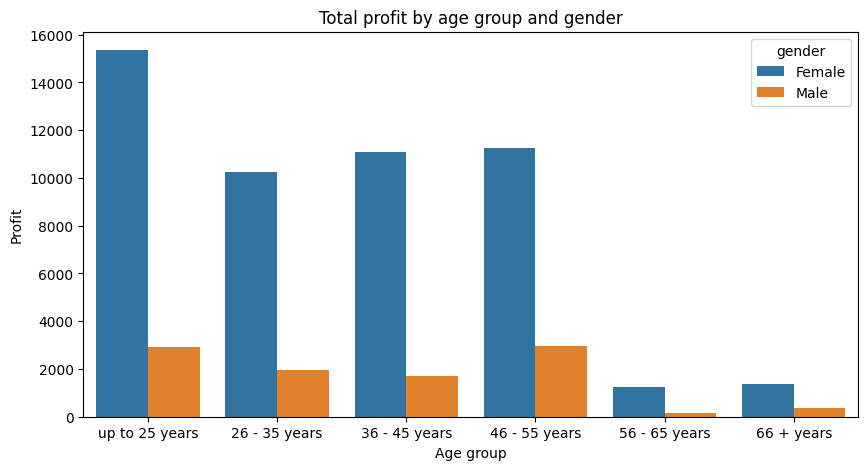

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'age_group', y = 'profit_margin', hue = 'gender', data = df, estimator=sum, errorbar = None)

plt.title('Total profit by age group and gender')
plt.xlabel('Age group')
plt.ylabel('Profit');

Найбільший прибуток принесли жінки вікової групи до 25 років. Найменший - відвідувачі старше 56 років.
Добре видно, що загалом жінки приносять в рази більше прибутку ніж чоловіки. Можна виділити чотири основні категорії лояльної цільової аудиторі, на які варто налаштовувати рекламні компанії: жінки до 25 років, жінки 25-35 років, жінки 36-46 років, жінки 46-55 років. 

Поглянемо скільки чоловіків та жінок в даному наборі даних:

In [40]:
n_female = df[df['gender'] == 'Female']['membership_id'].nunique()
n_male = df[df['gender'] == 'Male']['membership_id'].nunique()
n_all_customers = df['membership_id'].nunique()

In [41]:
print(f'В даному наборі даних {n_all_customers} відвідувачів\n'
      f'Серед них {n_female} жінок та {n_male} чоловіків\n'
      f'Жінки складають {n_female/n_all_customers*100:.2f} % відвідувачів')

В даному наборі даних 2601 відвідувачів
Серед них 2102 жінок та 499 чоловіків
Жінки складають 80.82 % відвідувачів


Жінки складають в рази більшу частину постійних клієнтів. Можна припустити, що жінки більш охоче оформлюють картки члена або в даних країнах більш прийнято саме жінкам здійснювати покупки для сім'ї тощо. Цей момент варто уточнити/дослідити щоб мати більш повне уявлення про цільову аудиторію. Рекомендовано також порівняти цей набір даних з даними за покупки здійснені без картки члена. А саме, дізнатись частку клієнтів з карткою та без, порівняти кількість покупок, профіт, середній чек тощо. Це надасть більш повну картину фінансових показників та ефективності програми лояльності.

#### 5. Чи відрізняється середній чек чоловіків та жінок?

In [42]:
# групування даних щоб визничити суму кожного чеку
# в даному випадку використано агрегацію mean(), оскільки колонка gross_bill_amount містить суму всіх товарів в чеку

female_amount_receipts = df[df['gender'] == 'Female'].groupby('receipt_number')['gross_bill_amount_correct'].mean()
male_amount_receipts = df[df['gender'] == 'Male'].groupby('receipt_number')['gross_bill_amount_correct'].mean()

In [43]:
print(f'Середній чек серед відвідувачів жінок - {female_amount_receipts.mean():.2f}\n'
     f'Середній чек серед відвідувачів чоловіків - {male_amount_receipts.mean():.2f}')

Середній чек серед відвідувачів жінок - 47.17
Середній чек серед відвідувачів чоловіків - 45.38


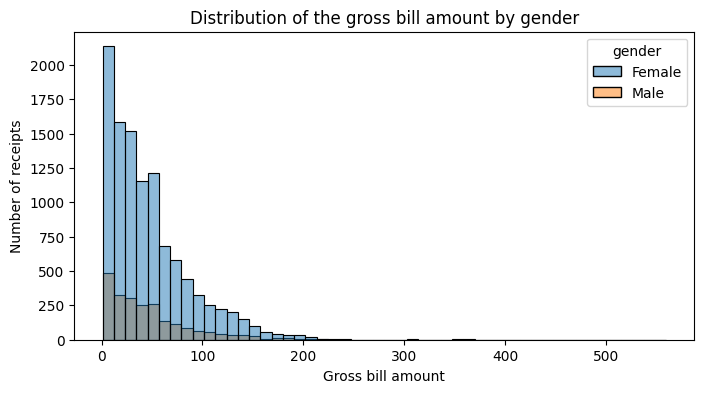

In [44]:
plt.figure(figsize=(8,4), dpi=100)

sns.histplot(data = 
                  df.groupby(['receipt_number', 'gender'])['gross_bill_amount_correct']
                 .mean().reset_index(), x='gross_bill_amount_correct', hue = 'gender', bins=50
            )

plt.title('Distribution of the gross bill amount by gender')
plt.xlabel('Gross bill amount')
plt.ylabel('Number of receipts');

Розподіли даних і для жінок, і для чоловіквів скошені вправо та мають подібну форму. Тобто відвідувачі в більшості випадків здійснюють покупки на невеликі суми. Також вирогідно є викиди в сторону великих чеків.  
Перевіримо чи є статистична значима різниця між сумою середнього чеку серед двох груп відвідувачів.

- Гіпотеза 0 - немає статистично значимої різниці між середнім чеком чоловіків та жінок
- Альтернативна гіпотеза - середній чек чоловіків суттєво менший за чек жінок

In [45]:
# в даному випадку доречне використання u-тесту Манна-Уітні

from scipy.stats import mannwhitneyu

In [46]:
# вибір рандомних значень з даних по жінкам щоб зрівняти два набори даних для більшої точності тесту

random_female_receipts = np.random.choice(female_amount_receipts, size=2260, replace=False)

In [47]:
u_statistic, p_value = mannwhitneyu(random_female_receipts, male_amount_receipts)

In [48]:
print(u_statistic, p_value)

2603862.5 0.2537742220701209


In [49]:
if p_value <= 0.05:
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")


Н0 не може бути відхилена.


Висновок: в тому, як відвідувачі витрачають гроші, немає суттєвих відмінностей за гендером. Відповідно чоловіки є також цікавою цільовою аудиторією для компанії. Варто дослідити як зацікавити більшу кількість чоловіків стати постійними клієнтами. Можна провести опитування (з заохоченням додатковими балами, спеціальними пропозиціями чи подарунками) серед постійних клієнтів чоловіків щодо того, які товари, акції, сервіси вони хотіли би бачити, а також що б могло спонукати їх радити магазини своїм знайомим.

####  6. Які топ 5 субкатегорії для кожної вікової групи по кількості придбаних товарів?

In [50]:
top_5_subcategory = (
    df.groupby(['age_group', 'sub_category', 'category'])['quantity']
    .sum().groupby(level=0, group_keys=False).nlargest(5)
)

In [51]:
top_5_subcategory

age_group       sub_category          category          
up to 25 years  BBQ Supplies          Kitchen & Dining      1191
                Dog Food & Trat       Pet Care              1104
                Oral Care             Beauty                 997
                skin care             Beauty                 875
                Frozen Vegetables     Frozen                 805
26 - 35 years   BBQ Supplies          Kitchen & Dining       802
                Oral Care             Beauty                 716
                Dog Food & Trat       Pet Care               602
                Disposable Tableware  Party Supplies         528
                Fresh Bread           Bakery & Breakfast     507
36 - 45 years   BBQ Supplies          Kitchen & Dining       800
                Dog Food & Trat       Pet Care               748
                Oral Care             Beauty                 696
                Disposable Tableware  Party Supplies         693
                Frozen Vegetables

На першому місці по кількості придбаних товарів у всіх вікових групах - приладдя для барбекю. Ця субкатегорія відноситься до категорії товарів для кухні, що є однією з найменш прибуткових. Можливо велика кількість придбаних одиниць визначена тим, що це недорогі, одноразові товари. Однак можна припустити, що такий вид досугу, як влаштування барбекю, є дуже популярним серед всіх вікових груп. Варто розглянути які пов'язані товари та продукти можна продавати для барбекю. Можливо варто пропонувати готові набори продуктів або зробити окремий відділ/стенд "Все для барбекю". Цю інформацію однозначно варто врахувати в розробці рекламних компаній.
Варто зазначити, що є ще спільні популярні субкатегорії для всх вікових груп - це товари догляду за шкірою та ротовою порожниною, а також їжа для собак. Що відносяться до категорій, що на 2-му та 4-му місці по прибутковості відповідно. Вся ця інформація допомагає детальніше скласти портрет цільової аудиторії і відповідно планувати асортимент товарів, маркетингові заходи. Наприклад, можна сказати , що молоді люди до 25 років турбуються про своїх тварин, приділяють значну увагу своїй зовнішності та цінують швидкість у приготуванні їжі (бо заморожені овочі зазвичай вже очищені та подрібнені).

#### 7. Які топ 10 брендів по кількості куплеих товарів для кожної вікової групи

In [52]:
top_10_brands = (
    df.groupby(['age_group', 'brand', 'sub_category'])['quantity']
    .sum().groupby(level=0, group_keys=False).nlargest(10)
)

In [53]:
top_10_brands

age_group       brand            sub_category        
up to 25 years  Sainbury         snacks                  422
                Ashai            Beer                    386
                Nature's Gift    Dog Food & Trat         366
                BonJour          Fresh Bread             359
                Anchor           Butter & Margarine      331
                Alpo             Dog Food & Trat         326
                PEDIGREE         Dog Food & Trat         321
                Nutro            Pet Food                313
                Yakult           Fresh Milk              303
                Erum             Frozen Vegetables       288
26 - 35 years   Sainbury         snacks                  274
                BonJour          Fresh Bread             265
                Ashai            Beer                    248
                Anchor           Butter & Margarine      226
                Yakult           Fresh Milk              217
                Biogreen       

Варто проаналізувати популярні бренди, якої вони цінової категорії, з яким позіціонуванням тощо. Це надась більше розуміння про вподобання відвідувачів, схожість/відмінність різних вікових груп. Можливо з деякими брендами варто домовитись про спільну маркетингову компанію. Наприклад, бачимо, що є популярний бренд пива Ashai для всіх вікових категорій, який молоді люди до 25 років придбали найбільшу кількість одиниць.

#### 8. Яка середня кількість повторних візитів в магазин?

In [54]:
n_repeat_purchase = (
                 df.groupby('membership_id')['receipt_number']
                 .nunique().reset_index().rename(columns={'receipt_number': 'n_receipts'})
)

In [55]:
print(f"Відвідувачі в середньому здійснють {n_repeat_purchase['n_receipts'].mean():.0f} повторних візитів")

Відвідувачі в середньому здійснють 5 повторних візитів


Поглянемо також на загальну картину повторних візитів, яка кількість повторних візитів не є типовою.

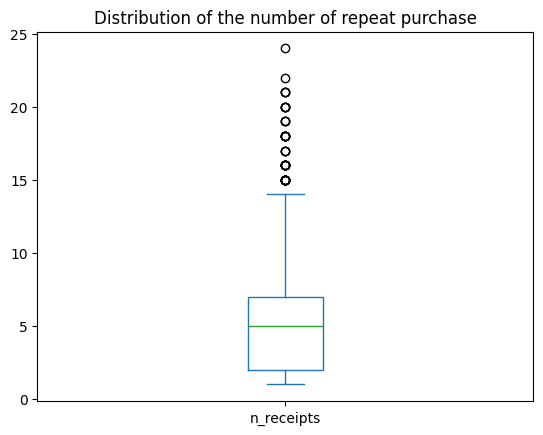

In [56]:
n_repeat_purchase.plot.box()

plt.title('Distribution of the number of repeat purchase');

Загалом відвідувачі здійснюють від 1 до 14 візитів. На графіку є викиди, тобто більша кількість за вказану не є типовою.

#### 9. Який середній час відвідувачі лишаються клієнтами компанії (тривалість життя клієнта Customer Lifespan)?

In [57]:
first_purchase = df.groupby('membership_id')['date'].min()
last_purchase = df.groupby('membership_id')['date'].max()

customer_lifespan_days = (last_purchase - first_purchase).dt.days

In [58]:
print(f'Ceредня тривалість життя клієнтів - {round(customer_lifespan_days.mean())} днів')

Ceредня тривалість життя клієнтів - 735 днів


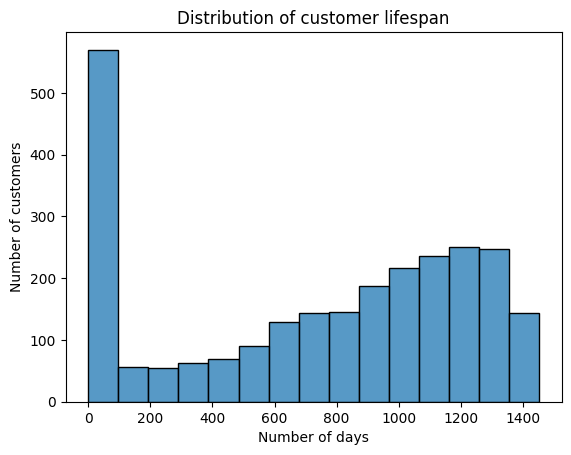

In [59]:
sns.histplot(data=customer_lifespan_days, bins=15)

plt.title('Distribution of customer lifespan')
plt.xlabel('Number of days')
plt.ylabel('Number of customers');

На графіку наявний великий пік в районі найменшої кількрості днів, цей пік вирогідно саме в значенні 0. Тобто є багато клієнтів, які здійснили лише один візит. Перевіримо це в наступному питанні.
Загалом гістограма скошена вліво, тобто також спотерігаємо і велику кількість відвідувачів, що довгий час є клієнтами компанії.

#### 10.  Який відсоток клієнтів не здійснило більше 1-го відвідування?

In [60]:
one_day_customers = n_repeat_purchase[n_repeat_purchase['n_receipts'] == 1]['n_receipts'].count()

In [61]:
all_customers = n_repeat_purchase['n_receipts'].count()

In [62]:
print(f'{one_day_customers/all_customers*100:.2f} % клієнтів здійснли лише одни візит в магазин')

20.03 % клієнтів здійснли лише одни візит в магазин


Підсумовуючи 8, 9 та 10 питання:
- В середньму відвідувачі здійснюють 5 повторних візитів
- Середній час життя клієнтів - 735 днів
- 20 % відвідувачів не здійснюють повторних покупок  

Ці цифри будуть корисні для постановки бізнес та маркетингових цілей.

Можна зробити висновок, що програма лояльності потребує уваги. Якщо клієнти і залишаються в компанії надовго, проте повторні візити здійснюють не часто.
Варто дослідити чи можна збільшити кількість повторних візитів та зменшити процент відвідувачів, що не повертаються.
Чи влаштовує відвідувачів сервіс? Які особливості розташування магазинів? Можливо варто додати сервіс з онлайн замовлень товарів або додати зону відпочинку, каву на виніс тощо. Рекомендовано провести опитування серед відвідувачів та дослідити конкурентів.

#### 11. Зі збільшенням отриманої знижки чи зростає кількість товарів та середня вартість чеку?

In [63]:
quantity_in_receipt = (
    df.groupby(['receipt_number', 'discount'])[['quantity', 'gross_bill_amount_correct']]
    .agg({'quantity': 'sum', 'gross_bill_amount_correct': 'mean'}).reset_index()
)

Попердньо виявлено неточність в розрахунках, причиною якої є 186 чеки, де
присутні більше одного виду знижки, хоча вцілому в кожному чеку приміняється лише один вид знижки.
Ці чеки доречно вилучити:

In [64]:
# таблиця з підрахунокм кількості знижок в чеку

n_discount = df.groupby('receipt_number')['discount'].nunique().reset_index()

In [65]:
to_drop = n_discount[n_discount['discount'] > 1]['receipt_number'].to_numpy()

In [66]:
quantity_in_receipt_clean = quantity_in_receipt[~quantity_in_receipt['receipt_number'].isin(to_drop)]

In [67]:
# групування по розміру знижки з підрахунком середньої кількості товарів в чеку та середньої суми

by_discount = quantity_in_receipt_clean.groupby('discount')[['quantity', 'gross_bill_amount_correct']].mean()
by_discount.round(2)

,quantity,gross_bill_amount_correct
discount,,
0.01,6.00,48.02
0.02,5.96,47.16
0.03,5.79,45.12
0.04,5.88,45.76
0.05,5.99,45.68


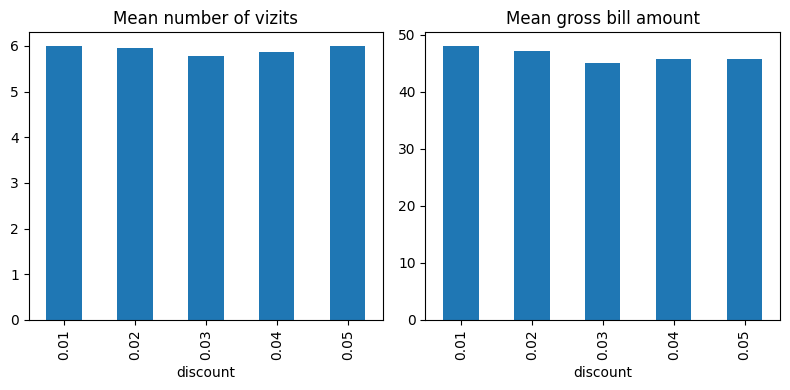

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

by_discount['quantity'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Mean number of vizits')

by_discount['gross_bill_amount_correct'].plot(kind='bar', ax=axes[1])
axes[1].set_title('Mean gross bill amount')

plt.tight_layout();

Зі збільшенням знижки в середньому відвідувачі не купують більше товарів в одному чеку, а також сумма середньго чеку не зростає. Тобто дана система знижок не стимулює відвідувачів купувати більшу кількість товарів чи дорожчі товари. Варто проаналізувати можливість збільшити середню кількість товарів у чеку та середню загальну вартість, продумати додаткові елементи програми лояльності та маркетингових заходів.

#### 12. Який графік відівдування магзинів по годинам для кожного міста?

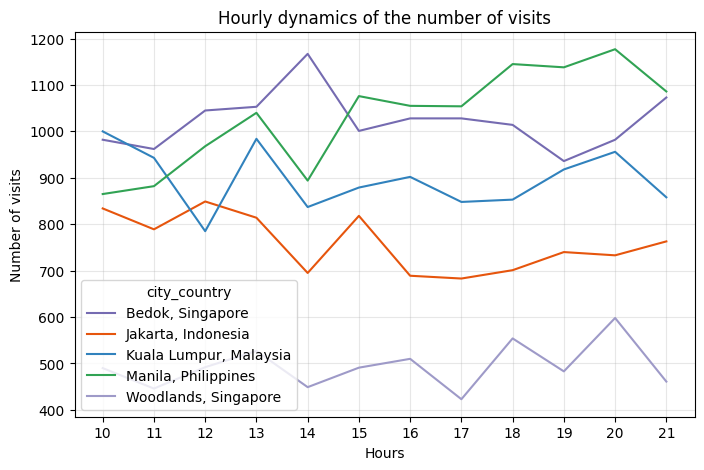

In [69]:
df.pivot_table(index='hour', columns='city_country', aggfunc='size').plot(figsize=(8,5), color = cmap([12, 4, 0, 8, 13]))

plt.xticks(np.arange(10, 22)) 
plt.grid(alpha=.3)

plt.title('Hourly dynamics of the number of visits')
plt.xlabel('Hours')
plt.ylabel('Number of visits');

Помітно, що в кожній місцевості є відмінності в пікових годинах. Варто звернути увагу, що в місті Бедок, Сінгапур графік має тенденцію до зростання відвідування з 19 до 21 години. Можливо в цьому місті варто продовжити робочі години на. Також ці графіки допоможуть регулювати необхідну залученість персоналу, створення маркетингових активностей. Наприклад, в містах Маніла та Джакарта спостерігається зниження кількості відвідувачів о 14 годині, в Куала Лумпур - 12 та 14 ргодини, в Бедок - 19 година, в Вудлендс - 17 година. Можна створити акційні пропозиції в цей час на певні види товарів (розпродати ранкову випічку, тощо).

In [70]:
# запис очищеної версії даних для створення репорту 

df.to_csv('grosto_clean.csv', index=False)

#### Візуалізація у вигляді інтерактивного репорту даних доступна за посиланням [Tableau Grosery Sales Dashbord](https://public.tableau.com/app/profile/hanna.zborovska/viz/FinalProject_17089736247760/GrostoSalesDashboard)